<a href="https://colab.research.google.com/github/RaedAbdelkefi/Data-Analysis/blob/main/Exploring_Clustering_and_Dimensionality_Reduction_Techniques_for_Financial_Market_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploring Clustering and Dimensionality Reduction Techniques for Financial Market Analysis

Elaborated by : Raed Abdelkafi \
Supervized by : Mr TEKAYA Wajdi

#Importing libraries

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import FactorAnalysis
from sklearn.mixture import GaussianMixture


#Loading Data

In [ ]:
# Download the list of S&P 500 tickers from Wikipedia
sp500_url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
sp500_table = pd.read_html(sp500_url)[0]
sp500_tickers = sp500_table['Symbol'].tolist()

# Define the start and end dates for the data
start_date = '2016-01-01'
end_date = '2022-12-31'

#download prices data
data = yf.download(sp500_tickers, start=start_date, end=end_date)

# Keep only the 'Close' prices for each stock
prices = data['Close']

# Calculate daily returns for each stock
returns = prices.pct_change()

[*********************100%***********************]  503 of 503 completed

2 Failed downloads:
- BRK.B: No timezone found, symbol may be delisted
- BF.B: No data found for this date range, symbol may be delisted


In [ ]:
df=returns.copy()
df

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,-0.003441,-0.009533,-0.006831,-0.025059,-0.004166,0.014626,-0.000233,0.003631,0.005205,0.004023,...,0.018904,0.010084,0.008521,0.020387,-0.000277,-0.002493,0.020823,-0.025117,-0.010857,0.015655
2016-01-06,0.004439,0.017522,-0.026455,-0.019570,0.000174,-0.015286,-0.008388,0.001592,-0.001954,-0.014295,...,-0.051805,0.010538,-0.008321,-0.014486,-0.012476,-0.007080,0.004330,-0.039957,-0.029145,0.000208
2016-01-07,-0.042475,-0.018918,0.011073,-0.042205,-0.002963,-0.031932,-0.023966,-0.001011,-0.029366,-0.020984,...,-0.094070,0.003842,-0.016006,-0.008785,-0.025828,-0.034116,-0.022993,-0.045316,-0.030020,-0.030404
2016-01-08,-0.010513,-0.001978,-0.021971,0.005288,-0.027268,-0.005785,-0.020944,-0.010414,-0.009681,-0.014140,...,-0.040704,-0.010935,-0.020202,-0.028635,-0.009510,-0.013607,-0.004217,-0.002693,-0.011254,-0.014605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,0.001476,0.011943,0.008446,-0.002798,-0.001041,0.004372,0.001389,0.008433,0.005023,0.005735,...,-0.006401,0.012852,0.026445,0.011118,-0.000728,0.000621,-0.000789,0.002869,0.003521,0.005033
2022-12-27,0.002144,-0.014162,0.012144,-0.013878,-0.000674,-0.005941,0.003605,0.003787,-0.002931,-0.009928,...,0.044723,0.009023,0.013894,0.007540,0.009022,0.007758,0.004657,0.011200,0.008050,-0.003156
2022-12-28,-0.009763,-0.016760,0.001931,-0.030685,-0.004663,-0.009704,-0.006816,-0.016033,-0.008255,-0.020174,...,-0.050279,-0.013972,-0.016426,-0.033988,-0.016077,-0.004542,-0.010135,-0.016574,-0.017813,-0.010117


#Cleaning and preprocessing the data

In [ ]:
df=df.drop(df.index[0])
df

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-05,-0.003441,-0.009533,-0.006831,-0.025059,-0.004166,0.014626,-0.000233,0.003631,0.005205,0.004023,...,0.018904,0.010084,0.008521,0.020387,-0.000277,-0.002493,0.020823,-0.025117,-0.010857,0.015655
2016-01-06,0.004439,0.017522,-0.026455,-0.019570,0.000174,-0.015286,-0.008388,0.001592,-0.001954,-0.014295,...,-0.051805,0.010538,-0.008321,-0.014486,-0.012476,-0.007080,0.004330,-0.039957,-0.029145,0.000208
2016-01-07,-0.042475,-0.018918,0.011073,-0.042205,-0.002963,-0.031932,-0.023966,-0.001011,-0.029366,-0.020984,...,-0.094070,0.003842,-0.016006,-0.008785,-0.025828,-0.034116,-0.022993,-0.045316,-0.030020,-0.030404
2016-01-08,-0.010513,-0.001978,-0.021971,0.005288,-0.027268,-0.005785,-0.020944,-0.010414,-0.009681,-0.014140,...,-0.040704,-0.010935,-0.020202,-0.028635,-0.009510,-0.013607,-0.004217,-0.002693,-0.011254,-0.014605
2016-01-11,-0.016844,0.017587,0.010236,0.016192,-0.031806,-0.039812,0.001475,-0.002046,0.010489,0.017416,...,-0.016453,0.008016,-0.013389,-0.019477,-0.008438,-0.001761,-0.017233,-0.006582,-0.019919,-0.028335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,0.001476,0.011943,0.008446,-0.002798,-0.001041,0.004372,0.001389,0.008433,0.005023,0.005735,...,-0.006401,0.012852,0.026445,0.011118,-0.000728,0.000621,-0.000789,0.002869,0.003521,0.005033
2022-12-27,0.002144,-0.014162,0.012144,-0.013878,-0.000674,-0.005941,0.003605,0.003787,-0.002931,-0.009928,...,0.044723,0.009023,0.013894,0.007540,0.009022,0.007758,0.004657,0.011200,0.008050,-0.003156
2022-12-28,-0.009763,-0.016760,0.001931,-0.030685,-0.004663,-0.009704,-0.006816,-0.016033,-0.008255,-0.020174,...,-0.050279,-0.013972,-0.016426,-0.033988,-0.016077,-0.004542,-0.010135,-0.016574,-0.017813,-0.010117


I discovered that BF.B and BRK.B have only Nan values

In [ ]:
Nan=['BF.B' ,  'BRK.B' ]
df=df.drop(columns=Nan)


To address the issue of missing values in the dataset, a technique called interpolation is applied. This method involves replacing each NaN value with the average of the nearest preceding and succeeding non-NaN values. By utilizing interpolation, the missing values are effectively filled in, ensuring a more complete and reliable dataset for further analysis and modeling.

In [ ]:
l=list()
for column in df.columns:
    for i in range(len(df)):
        if pd.isna(df.loc[df.index[i], column]):
          if column not in  l:
            l.append(column)
          if i==0:
            df.loc[df.index[i], column] = df.loc[df[column][i+1:].first_valid_index(), column]
          elif i==len(df)-1:
            for j in range(i - 1, -1, -1):
              if not pd.isnull(df.loc[df.index[j], column]):
                first_non_null_index = j
                break
            df.loc[df.index[i], column] = df.loc[df.index[j], column]
          else:
            for j in range(i - 1, -1, -1):
              if not pd.isnull(df.loc[df.index[j], column]):
                first_non_null_index = j
                break
            prev_value = df.loc[df.index[j], column]

            next_value = df.loc[df[column][i+1:].first_valid_index(), column]
            df.loc[df.index[i], column] = (prev_value + next_value) / 2


#Apply dimensionality reduction techniques

##PCA

In [ ]:
def pca_show(df):
  pca = PCA().fit(df)

  # plot the Cumulative Summation of the Explained Variance
  plt.figure()
  plt.plot(np.cumsum(pca.explained_variance_ratio_))

  # define the labels & title
  plt.xlabel('Number of Components')
  plt.ylabel('Variance (%)')
  plt.title('Explained Variance')

  # show the plot
  plt.show()

In [ ]:
def pca_bar(df):
  plt.figure(figsize=(6, 4))
  pca = PCA().fit(df)

  plt.figure(figsize=(6, 4))

  plt.bar(range(5),pca.explained_variance_ratio_[:5], alpha=0.5, align='center',
  label='individual explained variance')
  plt.ylabel('Explained variance ratio')
  plt.xlabel('Principal components')
  plt.legend(loc='best')
  plt.tight_layout()

In [ ]:
def factor_pca(df):
  pca = PCA(n_components=2).fit(df)

  factor_exposures = pd.DataFrame(index=["factor 1", "factor 2"],
                                  columns=df.columns,
                                  data = pca.components_).T

  return factor_exposures

#Factor Analysis

In [ ]:
def factor_fa(df):
  fa = FactorAnalysis(n_components=2).fit(df)

  factor_exposures = pd.DataFrame(index=["factor 1", "factor 2"],
                                columns=df.columns,
                                data=fa.components_).T
  return factor_exposures


#Manifold Learning

In [ ]:
def factor_ML(df):
  # Perform t-SNE
  tsne = TSNE(n_components=2, random_state=42)
  X_tsne = tsne.fit_transform(df)

  return X_tsne

#Apply clustering techniques

##Gaussian Mixture Model

In [ ]:
def GMM(X,n):
  gmm = GaussianMixture(n_components=10, random_state=42)
  gmm.fit(X)
  labels = gmm.predict(X)
  return labels

##KMeans

In [ ]:
def kmeans(X,n):
  kmeans = KMeans(n_clusters=n, random_state=42)
  kmeans.fit(X)
  labels = kmeans.labels_
  return labels

  # Scatter plot
  plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow')
  cbar = plt.colorbar()
  cbar.set_label('Cluster')
  plt.xlabel('t-SNE Dimension 1')
  plt.ylabel('t-SNE Dimension 2')
  plt.title('t-SNE with K-means Clustering')
  plt.show()

#Evaluating

In this evaluation process, we will apply different dimensionality reduction techniques, namely PCA, Factor Analysis, and Manifold Learning, and assess their performance using K-means clustering and Gaussian Mixture Models (GMM) clustering

##PCA

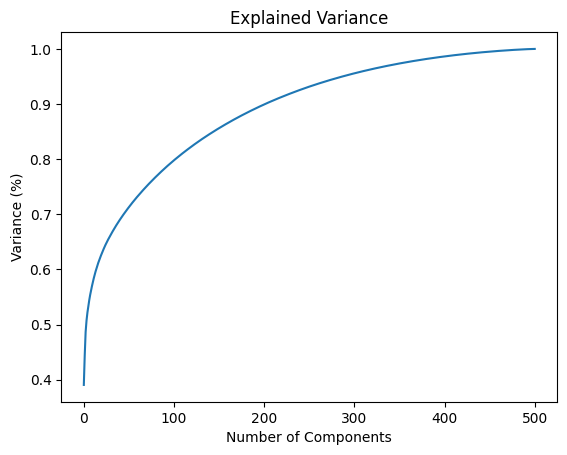

In [ ]:
scaler = StandardScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df.values), columns=df.columns, index=df.index)

pca_show(df_scaled)


<Figure size 600x400 with 0 Axes>

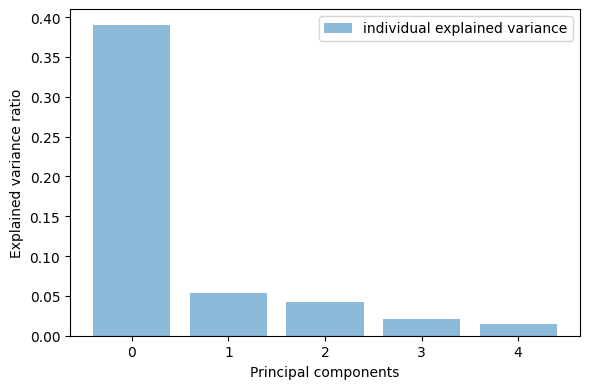

In [ ]:
pca_bar(df_scaled)

Let's focus on the PCA process and its implications. We will consider only two components for simplicity, but this can be extended to more components in practice. By analyzing the variance explained by each component, we can gain insights into the data structure. As we increase the number of components, we observe an increase in the explained variance.

KMeans

In [ ]:
factor_exposures=factor_pca(df_scaled)
X=factor_exposures[['factor 1','factor 2']].values
labels=kmeans(X,10)
factor_exposures['cluster']=labels
factor_exposures = factor_exposures.sort_values(by=factor_exposures.columns[0])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


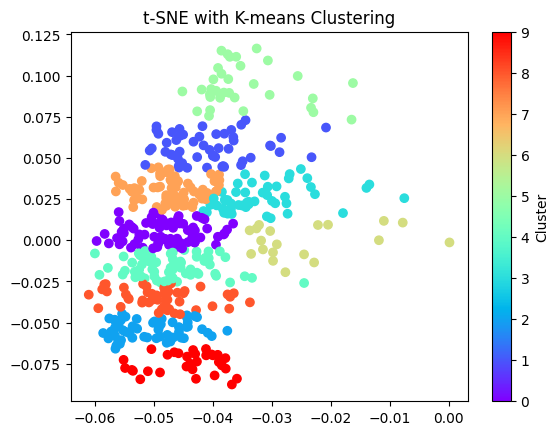

In [ ]:
# Scatter plot
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow')
cbar = plt.colorbar()
cbar.set_label('Cluster')

plt.title('t-SNE with K-means Clustering')
plt.show()

In the context of clustering, we can examine how the clusters are evaluated based on the two PCA components. For instance, let's take Cluster 6, which shows a high value on PCA Component 1 and a low value on PCA Component 2. This suggests that this portfolio has a high variance ratio, indicating that it is actively traded by many people. Examples of companies in this cluster might include Google and others.

In [ ]:
cluster_0_data = factor_exposures[factor_exposures['cluster']==7]

cluster_0_data.index


Index(['PAYX', 'ACN', 'MCO', 'ADP', 'MMC', 'AJG', 'SYK', 'FISV', 'SPGI', 'IQV',
       'HD', 'ROP', 'BRO', 'APD', 'INTU', 'A', 'CSCO', 'ISRG', 'ANSS', 'MSCI',
       'MTD', 'STE', 'FIS', 'BR', 'GOOGL', 'MSI', 'FICO', 'GOOG', 'AVB', 'WTW',
       'FDS', 'SNPS', 'UDR', 'CNP', 'AAPL', 'LH', 'MCD', 'SHW', 'AON', 'ICE',
       'FAST', 'COO', 'UNH', 'CRL', 'ESS', 'EQR', 'WAT', 'PAYC', 'O', 'ORCL',
       'TFX', 'PEAK', 'EFX', 'CME', 'ELV', 'RVTY', 'CRM', 'CSGP', 'IRM',
       'PYPL', 'EW', 'PGR', 'HOLX', 'LMT', 'PM', 'TECH', 'DGX', 'NOW'],
      dtype='object')

We see:


*  Amazon.com, Inc. (AMZN)
*  Facebook, Inc. (FB)



* Alphabet Inc. - Class A shares (GOOGL)
* Alphabet Inc. - Class C shares (GOOG)




* Johnson & Johnson (JNJ)
* Visa Inc. (V)
* Mastercard Incorporated (MA)
* Procter & Gamble Company (PG)





These are often considered as popular investments

Furthermore, PCA reveals the patterns of correlation among the original variables. When the original variables are highly correlated, they tend to cluster together in the principal components. This implies that variables contributing to the same principal component are strongly correlated with each other. By identifying such clusters through PCA, investors can better understand the sources of risk in their portfolio and take appropriate measures to manage that risk. For instance, they can diversify their holdings to reduce exposure to any single sector or employ hedging strategies against specific risks.

GMM

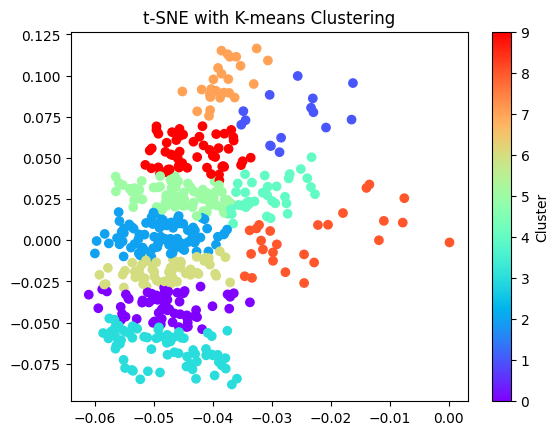

In [ ]:
labels=GMM(X,10)
factor_exposures['cluster']=labels
# Scatter plot
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow')
cbar = plt.colorbar()
cbar.set_label('Cluster')

plt.title('t-SNE with K-means Clustering')
plt.show()

During our evaluation, we observed slight differences between GMM and K-means clustering results. However, the behavior of Cluster 6 remained consistent across both clustering methods, indicating its distinct characteristics. This suggests that this particular cluster exhibits similar patterns and traits regardless of the clustering algorithm used.

Moving forward, we will explore other dimensionality reduction techniques, such as Factor Analysis and Manifold Learning, to assess their performance. Based on our analysis, it appears that Manifold Learning provides more accurate results compared to other techniques.

##Factor Analysis

KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


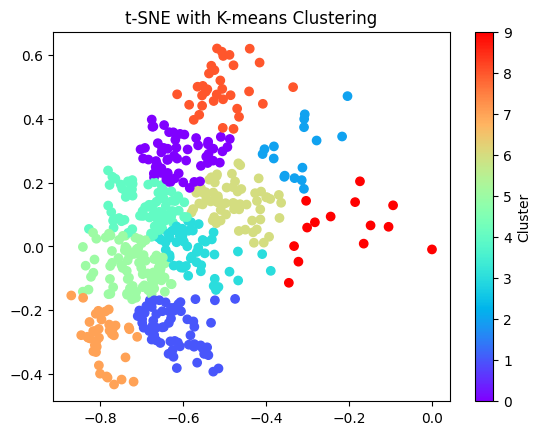

In [ ]:
factor_exposures=factor_fa(df_scaled)
X=factor_exposures[['factor 1','factor 2']].values
labels=kmeans(X,10)
factor_exposures['cluster']=labels
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow')
cbar = plt.colorbar()
cbar.set_label('Cluster')

plt.title('t-SNE with K-means Clustering')
plt.show()

GMM

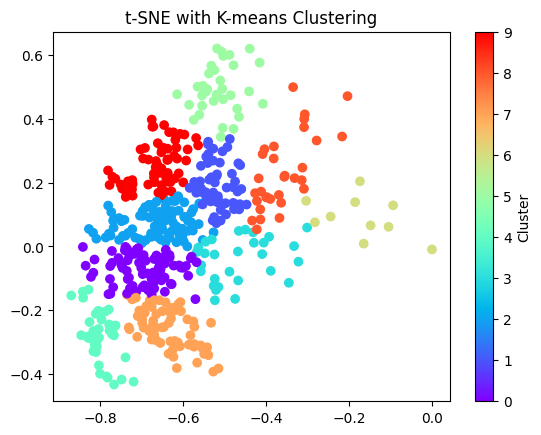

In [ ]:
labels=GMM(X,10)
factor_exposures['cluster']=labels
# Scatter plot
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow')
cbar = plt.colorbar()
cbar.set_label('Cluster')

plt.title('t-SNE with K-means Clustering')
plt.show()

#Manifold Learning

KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


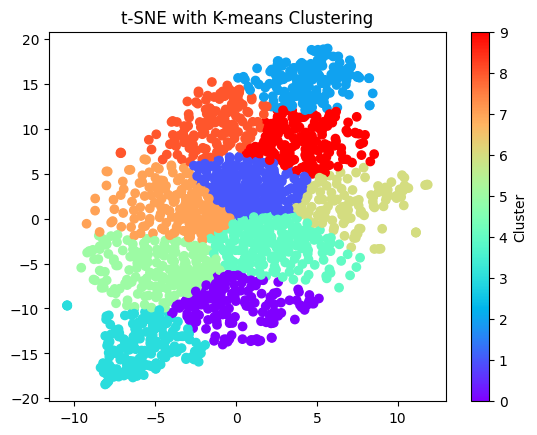

In [ ]:
factor_exposures=factor_ML(df_scaled)
X=factor_exposures
labels=kmeans(X,10)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow')
cbar = plt.colorbar()
cbar.set_label('Cluster')

plt.title('t-SNE with K-means Clustering')
plt.show()

By leveraging Manifold Learning, we can achieve a more accurate representation of the underlying data structure. This technique takes into account the non-linear relationships and complex interactions among the variables, allowing for a more comprehensive understanding of the data. As a result, the clusters derived from Manifold Learning are likely to capture finer nuances and reveal more intricate patterns in the dataset.


GMM

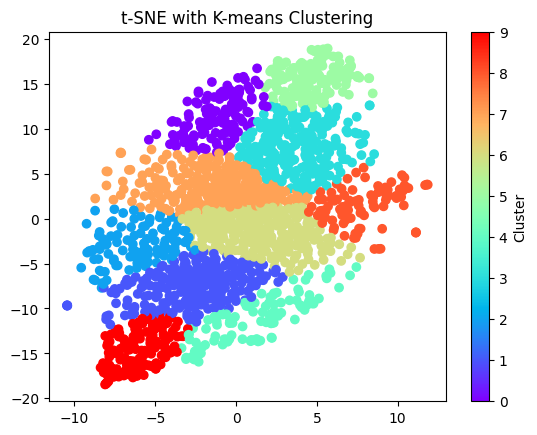

In [ ]:
labels=GMM(X,10)

# Scatter plot
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow')
cbar = plt.colorbar()
cbar.set_label('Cluster')

plt.title('t-SNE with K-means Clustering')
plt.show()

#Conclusions

In conclusion, applying various techniques in clustering and dimensionality reduction proves to be crucial for investors. These techniques provide valuable insights and aid in minimizing portfolio-related risks. By considering investments in multiple clusters, investors can diversify their holdings and reduce their exposure to specific sectors or risks.

Furthermore, these techniques enable investors to understand the dynamics of the market. They can identify popular investment choices and trends by observing where people are investing their money. This knowledge allows investors to make informed decisions and adapt to market conditions effectively.

Overall, leveraging clustering and dimensionality reduction techniques empowers investors to optimize their portfolios, manage risks, and stay attuned to market dynamics, thus enhancing their investment strategies and outcomes.

In [ ]:
!jupyter nbconvert --to html Raed_Abdelkafi.ipynb


[NbConvertApp] Converting notebook Raed_Abdelkafi.ipynb to html
[NbConvertApp] Writing 1285785 bytes to Raed_Abdelkafi.html
